La transición de sistemas expertos a lógica difusa marcó un cambio en la forma en que la inteligencia artificial (IA) abordaba la incertidumbre y la imprecisión en el conocimiento.

#Sistemas Expertos (Décadas de 1960-1980):

Década de 1960:

* En sus inicios, la IA se enfocó en desarrollar sistemas expertos basados en reglas if-then, donde los expertos humanos codificaban su conocimiento en reglas lógicas.

Década de 1970:

* MYCIN, un sistema experto diseñado para diagnosticar enfermedades infecciosas, fue un hito importante. Los sistemas expertos se aplicaron en diversas áreas, desde diagnóstico médico hasta control de procesos industriales.

Década de 1980:

* La popularidad de los sistemas expertos creció, pero se hicieron evidentes sus limitaciones en el manejo de la incertidumbre y la imprecisión presentes en el conocimiento humano.



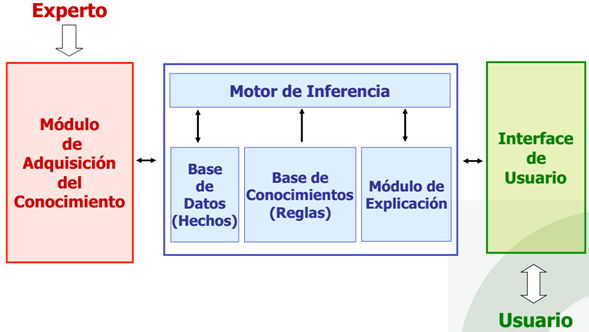



#Limitaciones y Necesidad de Modelar Incertidumbre:

Problemas con la Incertidumbre:

* La rigidez de las reglas if-then no era adecuada para manejar la incertidumbre y la ambigüedad inherentes a muchos problemas del mundo real.

Necesidad de Modelar Grados de Verdad:

* La IA enfrentó la necesidad de representar no solo verdadero o falso, sino grados de verdad entre estas dos categorías. La imprecisión en el conocimiento humano necesitaba un enfoque más flexible.

#Lógica Difusa (Década de 1980 en adelante):

Introducción de la Lógica Difusa:

* Lotfi Zadeh, en la década de 1960, propuso la lógica difusa como un marco matemático para representar la imprecisión y la incertidumbre. La lógica difusa permitía expresar grados de pertenencia a un conjunto, en lugar de pertenencia o no pertenencia clara.

Integración con Sistemas Expertos:

* A medida que la lógica difusa se desarrollaba, se integró con sistemas expertos para abordar las limitaciones relacionadas con la incertidumbre. La combinación de sistemas expertos y lógica difusa permitía un razonamiento más flexible.

Amplias Aplicaciones:

* La lógica difusa encontró aplicaciones en sistemas de control difuso, toma de decisiones, sistemas de recomendación, entre otros. Su capacidad para manejar la incertidumbre hizo que fuera valiosa en contextos donde las reglas precisas eran difíciles de definir.

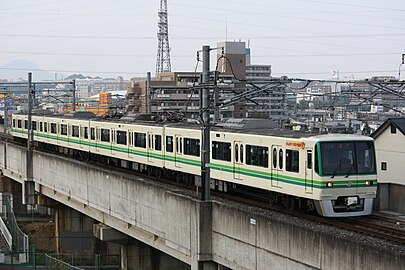

(Metro Sendai)

En resumen, la transición de sistemas expertos a lógica difusa representó una respuesta a la necesidad de lidiar con la incertidumbre inherente al conocimiento humano. La lógica difusa proporcionó un marco matemático que permitió a la inteligencia artificial trabajar de manera más efectiva en entornos complejos y poco definidos.

#Principios Básicos:

Conjuntos Difusos:

* En lugar de tener conjuntos con límites precisos, la lógica difusa trabaja con conjuntos difusos cuyos elementos tienen grados de pertenencia. Cada elemento pertenece al conjunto en cierto grado, desde totalmente perteneciente (1) hasta no perteneciente en absoluto (0).

* Funciones de Pertenencia:

Cada conjunto difuso está definido por una función de pertenencia que asigna un grado de pertenencia a cada elemento del conjunto. Estas funciones pueden tener diversas formas, como triángulos, trapecios o curvas más complejas.

Operaciones Difusas:

Operaciones sobre Conjuntos Difusos:

* En la lógica difusa, se definen operaciones difusas que permiten realizar operaciones lógicas y aritméticas con conjuntos difusos. Estas operaciones incluyen la unión, la intersección, la negación, etc.

Reglas Difusas:

* En lugar de reglas if-then rígidas como en la lógica clásica, se utilizan reglas difusas que expresan relaciones más flexibles entre conjuntos difusos. Cada regla tiene una premisa difusa y una conclusión difusa.

Proceso de Inferencia:

Fase de Fusión:

* Durante la inferencia, se combinan las reglas difusas que se aplican al problema en cuestión. Esto se realiza mediante operaciones de unión e intersección difusa para obtener conclusiones difusas.

Defusificación:

* La fase final es la defusificación, donde las conclusiones difusas se convierten en resultados numéricos o categorías precisas. Esto implica calcular un valor único o tomar una decisión basada en las conclusiones obtenidas de las reglas difusas.

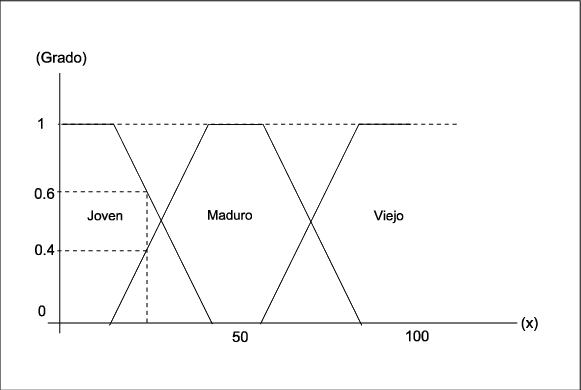

In [1]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=654e21260c6289147881ae5f1024e4eea38c37fe7db576916701ff0e803ce0bf
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


Velocidad del ventilador: 46.23188405797097


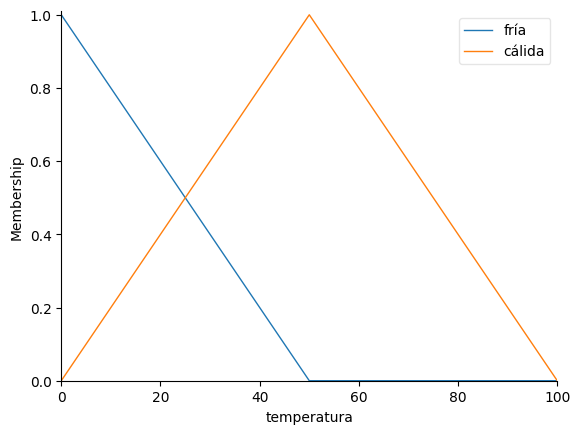

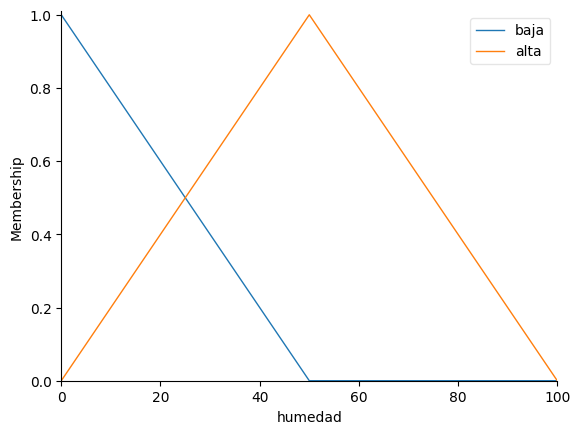

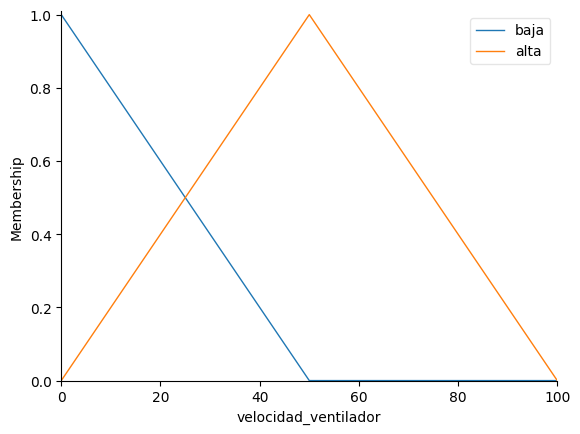

In [20]:

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Variables de entrada
temperatura = ctrl.Antecedent(np.arange(0, 101, 1), 'temperatura')
humedad = ctrl.Antecedent(np.arange(0, 101, 1), 'humedad')


# Variable de salida
velocidad_ventilador = ctrl.Consequent(np.arange(0, 101, 1), 'velocidad_ventilador')

# Definición de conjuntos difusos

#Se definen conjuntos difusos para cada variable (temperatura, humedad y velocidad del ventilador)
#utilizando funciones de membresía triangular (fuzz.trimf).

#Los conjuntos difusos representan etiquetas lingüísticas como "fría", "cálida", "baja", "alta", etc.
temperatura['fría'] = fuzz.trimf(temperatura.universe, [0, 0, 50])
temperatura['cálida'] = fuzz.trimf(temperatura.universe, [0, 50, 100])

humedad['baja'] = fuzz.trimf(humedad.universe, [0, 0, 50])
humedad['alta'] = fuzz.trimf(humedad.universe, [0, 50, 100])

velocidad_ventilador['baja'] = fuzz.trimf(velocidad_ventilador.universe, [0, 0, 50])
velocidad_ventilador['alta'] = fuzz.trimf(velocidad_ventilador.universe, [0, 50, 100])

# Reglas difusas

#Se definen reglas difusas que establecen la relación entre las entradas y la salida. En este caso, hay dos reglas:
#Regla 1: Si la temperatura es fría o la humedad es alta, entonces la velocidad del ventilador es alta.
#Regla 2: Si la temperatura es cálida o la humedad es baja, entonces la velocidad del ventilador es baja.

regla1 = ctrl.Rule(temperatura['cálida'] | humedad['alta'], velocidad_ventilador['alta'])
regla2 = ctrl.Rule(temperatura['fría'] | humedad['baja'], velocidad_ventilador['baja'])

# Sistema de control difuso
sistema_ctrl = ctrl.ControlSystem([regla1, regla2])
sistema = ctrl.ControlSystemSimulation(sistema_ctrl)

# Simulación con valores específicos de temperatura y humedad
sistema.input['temperatura'] = 70
sistema.input['humedad'] = 30

# Computar la salida del sistema de control difuso
# Cálculo de Activación de Reglas:

#El sistema de control difuso calcula la activación de cada regla en función de los valores de entrada proporcionados.
#La activación de una regla refleja cuánto la regla es "cierta" dada la entrada actual.
#La activación de las reglas se utiliza para inferir la contribución de cada regla a la salida.
#Este proceso se llama inferencia difusa. En este caso, se utiliza el método de inferencia "máximo" (max) para combinar las activaciones de las reglas.
#El operador max indica que la activación de la regla es el máximo de las activaciones individuales de las condiciones antecedentes.

#Por ejemplo, en la regla 1, la activación es el máximo entre la pertenencia de la temperatura al conjunto difuso "fría"
#y la pertenencia de la humedad al conjunto difuso "alta". La regla 2 sigue un principio similar.
#Esto refleja la idea de que la regla es más activa cuando al menos una de las condiciones antecedentes es fuertemente cierta.


#Defuzzificación:
#La salida difusa se convierte en un valor numérico mediante la defuzzificación. En este caso, se utiliza el método de centroide entroide del área bajo la curva de pertenencia de la función de
#membresía de la variable de salida para calcular el valor final de la velocidad del ventilador.

sistema.compute()

# Obtener el resultado
print("Velocidad del ventilador:", sistema.output['velocidad_ventilador'])
# Visualización de las funciones de membresía y la salida
temperatura.view()
humedad.view()
velocidad_ventilador.view()

plt.show()